# 의미 연결망 분석(Semantic Network Analysis)


* 사회 연결망 분석(Social Network Analysis)는 분석 대상 및 분석 대상들간의 관계를   
연결망 구조로 표현하고 이를 계량적으로 제시하는 분석 기법
* 사회 연결망 분석은 사람, 장소, 물품 등의 객체 간의 관계를 분석하는데 효과적이며  
주로 친구 관계, 전력 공급 등을 분석하는데 사용
* 사회 연결망 분석 기법을 텍스트 내 단어의 관계에 적용한 것이 바로 의미 연결망 분석
* 의미 연결망 분석에서는 `일정한 범위 내에서 어휘가 동시에 등장하면 서로 연결된 것으로 간주, 이 연결 관계들을 분석`

## n-gram


* `nltk` 라이브러리는 편하게 n-gram을 생성할 수 있는 함수를 제공
* 많이 사용되는 `bigrams`의 경우에는 별도의 함수를 제공하니 해당 내용을 참조하여 n-gram 생성

In [3]:
import nltk
nltk.download('punkt') # for sent_tokenize, 문장을 단어로 쪼개기 위한 자원 내려받기

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bini\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
from nltk import word_tokenize, bigrams

#단어 토큰화
sentence = 'I love data science and deep learning'
tokens = word_tokenize(sentence)
tokens

['I', 'love', 'data', 'science', 'and', 'deep', 'learning']

In [17]:
# 2개씩
bgram = bigrams(tokens)
bgram_list = [x for x in bgram]
print(bgram_list)

[('I', 'love'), ('love', 'data'), ('data', 'science'), ('science', 'and'), ('and', 'deep'), ('deep', 'learning')]


In [18]:
# 3개, 4개씩

from nltk.util import ngrams

tgram = ngrams(tokens,3)
qgram = ngrams(tokens,4)

tgram_list = [x for x in tgram]
qgram_list = [x for x in qgram]

print(tgram_list)
print(qgram_list)

[('I', 'love', 'data'), ('love', 'data', 'science'), ('data', 'science', 'and'), ('science', 'and', 'deep'), ('and', 'deep', 'learning')]
[('I', 'love', 'data', 'science'), ('love', 'data', 'science', 'and'), ('data', 'science', 'and', 'deep'), ('science', 'and', 'deep', 'learning')]


## 어휘 동시 출현 빈도의 계수화

* `동시 출현(Co-occurrence)`란 `두 개 이상의 어휘가 일정한 범위나 거리 내에서 함께 출현`하는 것을 의미
* 단어간의 동시 출현 관계를 분석하면 문서나 문장으로부터 두 단어가 유사한 의미를 가졌는지 등의 추상화된 정보를 얻을 수 있음
* 동시 출현 빈도는 `Window`라는 지정 범위 내에서 동시 등장한 어휘를 `확률` 등으로 계수화 가능
* 예를 들어, 단어 뒤 잘못된 단어가 온다면, 이를 동시 출현 빈도가 높은 단어로 `교정` 가능

* 어휘 동시 출현 빈도 행렬은 하나하나 측정할 수도 있지만, 바이그램 개수를 정리하면 편리하게 만들어 볼 수 있음
* `nltk`에서 제공하는 `ConditionalFreqDist` 함수를 이용하면 문맥별 단어 빈도를 쉽게 측정 가능

In [28]:
from nltk import ConditionalFreqDist

#바이그램 개수를 정리
sentences = ['I love data science and deep learning' , 'I love science', 'I know this code']
tokens = [word_tokenize(x) for x in sentences]
bgrams = [bigrams(x) for x in tokens]

token = []
for i in bgrams : 
    token += ([x for x in i])
    
token

[('I', 'love'),
 ('love', 'data'),
 ('data', 'science'),
 ('science', 'and'),
 ('and', 'deep'),
 ('deep', 'learning'),
 ('I', 'love'),
 ('love', 'science'),
 ('I', 'know'),
 ('know', 'this'),
 ('this', 'code')]

In [29]:
cfd = ConditionalFreqDist(token)
cfd.conditions()

['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this']

In [31]:
print(cfd['I'])
# 2개 유형으로, 3번 나옴

<FreqDist with 2 samples and 3 outcomes>


In [33]:
print(cfd['I']['love']) 
# I love 동시출현이 2번 있음

2


In [35]:
print(cfd['I'].most_common(1)) 
#I랑 동시출현이 제일 높은것 

[('love', 2)]


In [41]:
import numpy as np

freq_matrix = []

for i in cfd.keys() : 
    temp = []
    for j in cfd.keys() :
        temp.append(cfd[i][j])   # 전체 단어와 단어들 간에 빈도 
    freq_matrix.append(temp)
freq_matrix = np.array(freq_matrix)

print(cfd.keys())
print(freq_matrix)

dict_keys(['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this'])
[[0 2 0 0 0 0 1 0]
 [0 0 1 1 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0]]


* 해당 동시 출현 빈도 행렬을 좀 더 보기 쉽도록 데이터프레임으로 시각화

In [43]:
import pandas as pd

df = pd.DataFrame(freq_matrix, index=cfd.keys(), columns = cfd.keys())
df.style.background_gradient(cmap='coolwarm')

,I,love,data,science,and,deep,know,this
I,0,2,0,0,0,0,1,0
love,0,0,1,1,0,0,0,0
data,0,0,0,1,0,0,0,0
science,0,0,0,0,1,0,0,0
and,0,0,0,0,0,1,0,0
deep,0,0,0,0,0,0,0,0
know,0,0,0,0,0,0,0,1
this,0,0,0,0,0,0,0,0


* 동시 출현 빈도 행렬은 `인접 행렬(Adjacency matrix)`로도 간주할 수 있음
* `networksx`라이브러리를 사용해 해당 행렬을 그래프로 시각화

* 앞서 만든 데이터프레임을 그래프로 변환
* 넘파일 배열 등으로도 가능하나, 이 경우 별도로 라벨을 지정해줘야만 함

In [45]:
import networkx as nx

G = nx.from_pandas_adjacency(df) #판다스 인접행렬만 가능
print(G.nodes()) #각각의 단어들이 노드가 됨
print(G.edges()) #노드들을 잇는 엣지
# 엣지 가중치는 표현 안하나?

['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this']
[('I', 'love'), ('I', 'know'), ('love', 'data'), ('love', 'science'), ('data', 'science'), ('science', 'and'), ('and', 'deep'), ('know', 'this')]


In [46]:
print(G.edges()[('I', 'love')])
print(G.edges()[('I', 'know')]) #가중치 표현하네용

{'weight': 2}
{'weight': 1}


* `nx.draw`를 통해 간편하게 그래프 시각화 가능

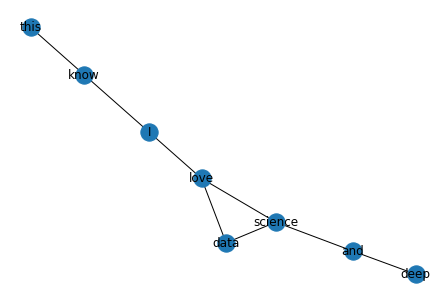

In [54]:
nx.draw(G, with_labels=True)
#단어들의 연결망을 구성하는 형태
#가중치는 그래프에 표현이 안되네

* 어휘 동시 출현 빈도를 이용하면 어휘 동시 출현 확률까지 측정 가능
* nltk의 `ConditionalProbDist`를 이용

In [51]:
from nltk.probability import ConditionalProbDist, MLEProbDist

cpd = ConditionalProbDist(cfd, MLEProbDist)
cpd.conditions()

['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this']

In [53]:
prob_matrix = []

for i in cpd.keys() :
    prob_matrix.append([cpd[i].prob(j) for j in cpd.keys()])
    
prob_matrix = np.array(prob_matrix)
print(cpd.keys())
print(prob_matrix)

dict_keys(['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this'])
[[0.         0.66666667 0.         0.         0.         0.
  0.33333333 0.        ]
 [0.         0.         0.5        0.5        0.         0.
  0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]


In [55]:
df = pd.DataFrame(prob_matrix, index=cpd.keys(), columns=cpd.keys())
df.style.background_gradient(cmap = 'coolwarm')

,I,love,data,science,and,deep,know,this
I,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000
love,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000
data,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
science,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
and,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
deep,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
know,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
this,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


* 확률 행렬도 인접 행렬로 간주할 수 있음
* 그래프 시각화시 확률을 가중치로 사용시 부정확할 결과를 얻을 수 있음

In [56]:
prob_G = nx.from_pandas_adjacency(df)

print(G.nodes()) #각각의 단어들이 노드가 됨
print(G.edges()) #노드들을 잇는 엣지

['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this']
[('I', 'love'), ('I', 'know'), ('love', 'data'), ('love', 'science'), ('data', 'science'), ('science', 'and'), ('and', 'deep'), ('know', 'this')]


In [59]:
print(prob_G.edges()[('I', 'love')])
print(prob_G.edges()[('I', 'know')]) #가중치 표현하네용

{'weight': 0.6666666666666666}
{'weight': 0.3333333333333333}


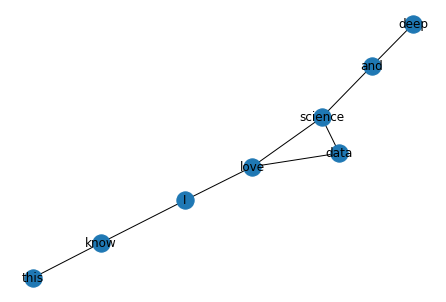

In [60]:
nx.draw(G, with_labels=True)